In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy

import os 
import glob

In [445]:
video_gait = []
video_gait_mean = []
pres_gait = []
pres_gait_mean = []

for i in glob.glob('D:/gait_dataset/gilon/*_annotation.txt'):
    df = pd.read_csv(i)
    video_gait.append(df.video)
    video_gait_mean.append(np.mean(df.video))
    pres_gait.append(df.pressure)
    pres_gait_mean.append(np.mean(df.pressure))

video_gait = np.array(list(itertools.chain.from_iterable(video_gait)))
pres_gait = np.array(list(itertools.chain.from_iterable(pres_gait)))
video_gait_mean = np.round(video_gait_mean, 3)
pres_gait_mean = np.round(pres_gait_mean, 3)

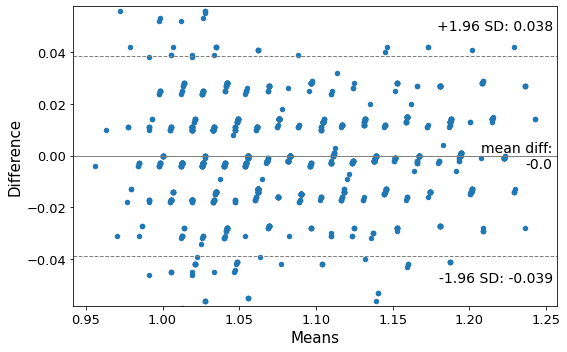

In [446]:
import statsmodels.api as sm
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(video_gait, pres_gait, ax = ax)
plt.show()

In [447]:
df = {'video' : video_gait_mean, 'pressure ' : pres_gait_mean}
pd.DataFrame(df)

,video,pressure
0,1.157,1.157
1,1.080,1.081
2,1.032,1.032
3,1.079,1.079
4,1.198,1.198
5,1.029,1.029
6,1.016,1.016
7,1.133,1.133
8,1.079,1.079


In [448]:
# 한 사람의 걸음 수에 대해 검정할 경우, video anno에 대해 변수가 많기 때문에 일관적인 결과를 나타내지 않음
# -> 모든 검정 결과가 유의하지 않다고 나오긴 함 : 귀무가설 채택
# 평균을 통해 전체적인 맥락에서 비교가 필요
# 처리의 전후가 아닌 독립적인 처리(not paired)이므로 Mann-Whitney U 검정 실시

scipy.stats.mannwhitneyu(video_gait_mean, pres_gait_mean)

MannwhitneyuResult(statistic=40.0, pvalue=1.0)

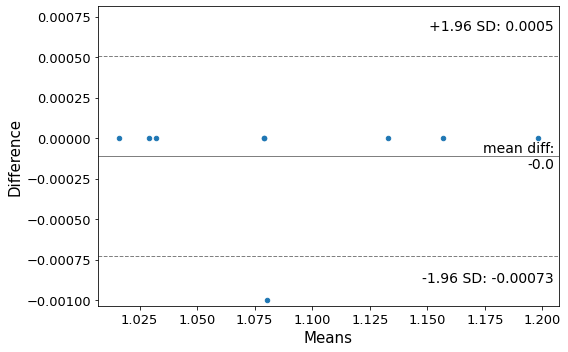

In [449]:
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(video_gait_mean, pres_gait_mean, ax = ax)
plt.show()

# Pressure Stride

In [171]:
# Stride = HS에서 다음 HS까지의 거리
glob.glob('D:/gait_dataset/gilon/*_3km_R.csv')

['D:/gait_dataset/gilon\\김보민_220530_3km_R.csv',
 'D:/gait_dataset/gilon\\박준영_220530_3km_R.csv',
 'D:/gait_dataset/gilon\\신수종_220602_3km_R.csv',
 'D:/gait_dataset/gilon\\왕준기_220602_3km_R.csv',
 'D:/gait_dataset/gilon\\이고은_220530_3km_R.csv',
 'D:/gait_dataset/gilon\\이정호_220530_3km_R.csv',
 'D:/gait_dataset/gilon\\최영찬_220602_3km_R.csv',
 'D:/gait_dataset/gilon\\최창환_220602_3km_R.csv',
 'D:/gait_dataset/gilon\\태민우_220526_3km_R.csv']

In [411]:
df = pd.read_csv('D:\gait_dataset/gilon/태민우_220526_3km_R.csv')
df.columns = ['name', 'addr', 'timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
              'pr1', 'pr2', 'pr3', 'p4', 'pr5', 'pr6', 'pr7', 'p8', 'pr9', 'pr10', 'num']

In [412]:
df_prs = df.filter(regex="p")
df_pres_mean = np.mean(df_prs.iloc[:, 1:5], axis=1) # timestep 별 4개 압력 측정값의 평균

In [413]:
min(df_pres_mean)

15.0

interpolation before / after : 9242 / 13863


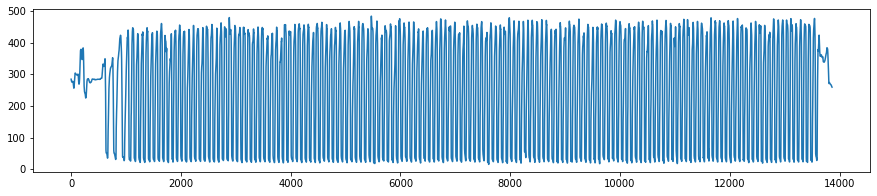

In [414]:
# sampling rate를 영상 frame과 동일하게 통일
sampling_rate = 40
frame = 60
intp = frame / sampling_rate

df_pres_mean_intp = cv2.resize(np.array(df_pres_mean), dsize=(1, int(len(df_pres_mean)*intp)))

plt.figure(figsize=(15,3))
plt.plot(df_pres_mean_intp)
print('interpolation before / after :',len(df_pres_mean), '/', len(df_pres_mean_intp))

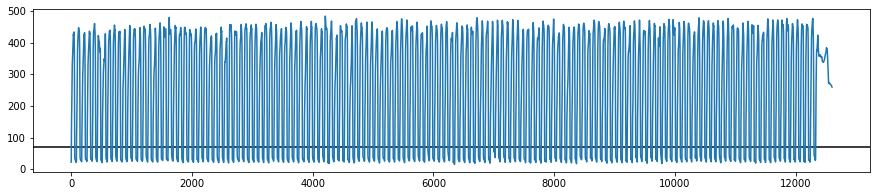

In [430]:
plt.figure(figsize=(15,3))
plt.axhline(y=70, color='k')
plt.plot(df_pres_mean_intp[1259:])

In [431]:
lev_shift = pd.Series(df_pres_mean_intp[1259:].flatten())> 70
lev_shift_int = lev_shift.map(lambda x : 1 if x else 0)
lev_shift_int = lev_shift_int.reset_index(drop=True)

idx = []
for i in range(len(lev_shift_int)-1):
    if (lev_shift_int[i] - lev_shift_int[i+1]) != 0:
        idx.append(i)

In [432]:
gait_unit_hz_shift = np.diff(idx) 
gait_unit_hz_shift

array([55, 31, 57, 31, 57, 31, 56, 31, 53, 29, 56, 27, 58, 26, 55, 28, 53,
       26, 55, 32, 53, 30, 54, 28, 55, 31, 56, 29, 53, 31, 55, 30, 55, 27,
       53, 31, 54, 30, 58, 28, 55, 29, 57, 27, 57, 29, 55, 29, 53, 30, 52,
       28, 55, 30, 57, 30, 54, 32, 54, 27, 54, 27, 54, 28, 55, 33, 53, 29,
       54, 30, 54, 28, 52, 28, 57, 25, 55, 29, 53, 29, 55, 26, 55, 28, 55,
       30, 53, 29, 55, 28, 58, 31, 54, 29, 52, 31, 55, 29, 55, 28, 54, 29,
       52, 29, 55, 28, 55, 28, 56, 31, 54, 30, 52, 28, 56, 30, 53, 31, 54,
       28, 55, 29, 53, 30, 55, 28, 54, 30, 53, 28, 53, 31, 53, 28, 57, 30,
       53, 28, 53, 29, 51, 28, 53, 29, 56, 29, 55, 29, 52, 30, 56, 29, 53,
       30, 58, 28, 55, 30, 54, 29, 54, 28, 54, 31, 54, 30, 56, 27, 54, 28,
       56, 30, 55, 30, 55, 29, 55, 29, 54, 31, 55, 29, 55, 31, 57, 28, 55,
       30, 54, 29, 55, 30, 55, 29, 55, 30, 54, 30, 53, 29, 54, 30, 56, 30,
       55, 28, 54, 28, 56, 28, 56, 28, 55, 29, 57, 30, 54, 28, 55, 25, 56,
       30, 54, 28, 52, 29

In [433]:
gait_unit_sec_shift = gait_unit_hz_shift/60
gait_unit_sec_shift

array([0.91666667, 0.51666667, 0.95      , 0.51666667, 0.95      ,
       0.51666667, 0.93333333, 0.51666667, 0.88333333, 0.48333333,
       0.93333333, 0.45      , 0.96666667, 0.43333333, 0.91666667,
       0.46666667, 0.88333333, 0.43333333, 0.91666667, 0.53333333,
       0.88333333, 0.5       , 0.9       , 0.46666667, 0.91666667,
       0.51666667, 0.93333333, 0.48333333, 0.88333333, 0.51666667,
       0.91666667, 0.5       , 0.91666667, 0.45      , 0.88333333,
       0.51666667, 0.9       , 0.5       , 0.96666667, 0.46666667,
       0.91666667, 0.48333333, 0.95      , 0.45      , 0.95      ,
       0.48333333, 0.91666667, 0.48333333, 0.88333333, 0.5       ,
       0.86666667, 0.46666667, 0.91666667, 0.5       , 0.95      ,
       0.5       , 0.9       , 0.53333333, 0.9       , 0.45      ,
       0.9       , 0.45      , 0.9       , 0.46666667, 0.91666667,
       0.55      , 0.88333333, 0.48333333, 0.9       , 0.5       ,
       0.9       , 0.46666667, 0.86666667, 0.46666667, 0.95   

In [275]:
def twoSum(a, n):
    b = []
    for i in range(0, n, 2):
        if (i == n-1):
            b.append(a[i])
        else:
            b.append(a[i] + a[i+1])

    return b

In [434]:
pres_stride = twoSum(gait_unit_sec_shift, len(gait_unit_sec_shift))
len(twoSum(gait_unit_sec_shift, len(gait_unit_sec_shift)))

148

In [435]:
video_stride = pd.read_csv('태민우.txt', header=None)
len(video_stride)

144

In [437]:
len(pres_stride[:len(video_stride)])

144

In [438]:
pres_stride = np.round(np.round(pres_stride[:len(video_stride)], 3) * (3000/3600), 3)

In [439]:
scipy.stats.mannwhitneyu(pres_stride, video_stride)

MannwhitneyuResult(statistic=array([10577.]), pvalue=array([0.76533302]))

In [407]:
pres_stride

array([1.125, 1.069, 1.056, 1.028, 1.028, 1.028, 1.042, 1.028, 1.111,
       1.069, 0.986, 1.028, 1.   , 1.028, 1.042, 1.014, 1.042, 0.986,
       1.125, 1.014, 1.056, 1.056, 1.056, 1.069, 1.125, 1.056, 1.056,
       1.028, 1.056, 1.083, 1.042, 1.083, 1.083, 1.056, 1.083, 1.098,
       1.042, 1.069, 1.028, 1.056, 1.042, 1.042, 1.028, 1.069, 1.083,
       1.098, 1.111, 1.042, 1.083, 1.083, 1.056, 1.014, 1.042, 1.028,
       1.056, 1.014, 1.111, 1.042, 1.069, 1.083, 1.083, 1.152, 1.111,
       1.098, 1.125, 1.098, 1.056, 1.125, 1.056, 1.098, 1.056, 1.056,
       1.069, 1.028, 1.139, 1.083, 1.111, 1.125, 1.056, 1.042, 1.069,
       1.056, 1.069, 1.125, 1.098, 1.152, 1.139, 1.139, 1.125, 1.098,
       1.098, 1.098, 1.028, 1.125, 1.042, 1.042, 1.083, 1.098, 1.014,
       1.125, 1.083, 1.069, 1.125, 1.098, 1.152, 1.111, 1.098, 1.152,
       1.125, 1.069, 1.014, 1.083, 1.056, 1.139, 1.083, 1.111, 1.014,
       1.056, 1.069, 1.   , 1.056, 1.152, 1.139, 1.069, 1.111, 1.098,
       1.152, 1.139,

In [427]:
video_stride

,0
0,1.207
1,1.194
2,1.222
3,1.194
4,1.167
...,...
139,1.139
140,1.111
141,1.139
142,1.138


In [440]:
df = {'video' : np.array(video_stride).flatten(), 'pressure' : pres_stride}

In [441]:
pd.DataFrame(df).to_csv('D:/gait_dataset/gilon/220526_태민우_3km_annotation.txt', index=False)

# Video Stride

In [211]:
glob.glob('D:/gait_dataset/gilon/*_3km.txt')

['D:/gait_dataset/gilon\\김보민_220530_3km.txt',
 'D:/gait_dataset/gilon\\박준영_220530_3km.txt',
 'D:/gait_dataset/gilon\\신수종_220602_3km.txt',
 'D:/gait_dataset/gilon\\왕준기_220602_3km.txt',
 'D:/gait_dataset/gilon\\이고은_220530_3km.txt',
 'D:/gait_dataset/gilon\\이정호_220530_3km.txt',
 'D:/gait_dataset/gilon\\최영찬_220602_3km.txt',
 'D:/gait_dataset/gilon\\최창환_220602_3km.txt',
 'D:/gait_dataset/gilon\\태민우_220526_3km.txt']

In [216]:
df_video = pd.read_csv('D:/gait_dataset/gilon\\김보민_220530_3km.txt', sep='\t', header=None)
df_video

,0,1,2,3,4,5,6,7,8
0,default,NaN,00:00:00.133,0.133,00:00:01.033,1.033,00:00:00.900,0.900,NaN
1,default,NaN,00:00:01.433,1.433,00:00:02.333,2.333,00:00:00.900,0.900,NaN
2,default,NaN,00:00:02.766,2.766,00:00:03.600,3.600,00:00:00.834,0.834,NaN
3,default,NaN,00:00:04.033,4.033,00:00:04.900,4.900,00:00:00.867,0.867,NaN
4,default,NaN,00:00:05.366,5.366,00:00:06.233,6.233,00:00:00.867,0.867,NaN
...,...,...,...,...,...,...,...,...,...
135,default,NaN,00:02:55.333,175.333,00:02:56.166,176.166,00:00:00.833,0.833,NaN
136,default,NaN,00:02:56.600,176.600,00:02:57.433,177.433,00:00:00.833,0.833,NaN
137,default,NaN,00:02:57.833,177.833,00:02:58.666,178.666,00:00:00.833,0.833,NaN
138,default,NaN,00:02:59.066,179.066,00:02:59.966,179.966,00:00:00.900,0.900,NaN


In [218]:
np.array(df_video.loc[1:, 3]) - np.array(df_video.loc[:len(df_video)-2, 5])

array([0.4  , 0.433, 0.433, 0.466, 0.433, 0.467, 0.433, 0.433, 0.433,
       0.434, 0.4  , 0.4  , 0.434, 0.4  , 0.466, 0.433, 0.433, 0.4  ,
       0.4  , 0.467, 0.467, 0.433, 0.434, 0.467, 0.467, 0.434, 0.467,
       0.433, 0.433, 0.467, 0.433, 0.434, 0.433, 0.434, 0.434, 0.434,
       0.467, 0.4  , 0.4  , 0.433, 0.4  , 0.4  , 0.43 , 0.433, 0.434,
       0.433, 0.4  , 0.433, 0.4  , 0.4  , 0.433, 0.4  , 0.4  , 0.433,
       0.4  , 0.4  , 0.4  , 0.434, 0.4  , 0.433, 0.4  , 0.4  , 0.433,
       0.4  , 0.4  , 0.433, 0.466, 0.433, 0.433, 0.434, 0.4  , 0.467,
       0.467, 0.4  , 0.434, 0.467, 0.434, 0.433, 0.5  , 0.467, 0.467,
       0.466, 0.467, 0.466, 0.434, 0.433, 0.433, 0.433, 0.433, 0.433,
       0.4  , 0.367, 0.367, 0.434, 0.434, 0.4  , 0.434, 0.4  , 0.466,
       0.4  , 0.434, 0.4  , 0.467, 0.467, 0.433, 0.433, 0.433, 0.4  ,
       0.433, 0.4  , 0.433, 0.433, 0.467, 0.467, 0.4  , 0.4  , 0.433,
       0.4  , 0.433, 0.4  , 0.433, 0.433, 0.433, 0.433, 0.4  , 0.4  ,
       0.4  , 0.4  ,

In [220]:
stride = np.array(df_video.loc[:len(df_video)-2, 7]) + (np.array(df_video.loc[1:, 3]) - np.array(df_video.loc[:len(df_video)-2, 5]))
stride

array([1.3  , 1.333, 1.267, 1.333, 1.3  , 1.334, 1.266, 1.3  , 1.3  ,
       1.334, 1.3  , 1.3  , 1.3  , 1.266, 1.3  , 1.3  , 1.3  , 1.267,
       1.267, 1.333, 1.3  , 1.3  , 1.267, 1.3  , 1.3  , 1.3  , 1.4  ,
       1.333, 1.333, 1.367, 1.333, 1.334, 1.333, 1.367, 1.3  , 1.3  ,
       1.3  , 1.266, 1.3  , 1.3  , 1.234, 1.266, 1.33 , 1.333, 1.267,
       1.266, 1.267, 1.3  , 1.204, 1.233, 1.3  , 1.234, 1.266, 1.267,
       1.233, 1.3  , 1.267, 1.267, 1.233, 1.333, 1.267, 1.267, 1.266,
       1.267, 1.3  , 1.333, 1.3  , 1.3  , 1.3  , 1.334, 1.3  , 1.333,
       1.367, 1.3  , 1.4  , 1.4  , 1.3  , 1.366, 1.4  , 1.367, 1.367,
       1.366, 1.367, 1.333, 1.334, 1.366, 1.367, 1.3  , 1.3  , 1.3  ,
       1.267, 1.233, 1.3  , 1.267, 1.3  , 1.3  , 1.3  , 1.266, 1.3  ,
       1.234, 1.3  , 1.3  , 1.333, 1.3  , 1.333, 1.267, 1.3  , 1.3  ,
       1.333, 1.234, 1.333, 1.3  , 1.3  , 1.3  , 1.267, 1.266, 1.3  ,
       1.234, 1.266, 1.267, 1.3  , 1.333, 1.3  , 1.267, 1.267, 1.3  ,
       1.233, 1.267,

In [ ]:
video = np.round(stride * (3000/3600), 3)
video

In [170]:
pd.Series(video).to_csv('태민우.txt', index=False, header=None)